In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

base = '/content/COVID-19_Radiography_Dataset/'

In [3]:
folders = os.listdir(base)
print(folders)

['Normal', 'Lung_Opacity', 'COVID', 'Viral Pneumonia']


In [12]:
%%time

Data, Lables = [], []

for item in folders:
    new_path = os.path.join(base, item)
    new_path += '/images'
    for img in os.listdir(new_path):
        img_path = os.path.join(new_path, img)
        Data.append(np.array(cv2.resize(cv2.imread(img_path).astype('float32') / 255.0, (200,200))))
        Lables.append(folders.index(item))

CPU times: user 2min 14s, sys: 2min 3s, total: 4min 17s
Wall time: 2min 25s


In [13]:
x_train, x_test, y_train, y_test = train_test_split(Data, Lables, test_size = .2, random_state = 1)

In [14]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
model = keras.Sequential()
# 1st Convolutional Layer
model.add(keras.layers.Conv2D(filters=96, input_shape=(Data[0].shape), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(keras.layers.BatchNormalization())

# 2nd Convolutional Layer
model.add(keras.layers.Conv2D(filters=256, kernel_size=(5,5),strides=(1,1), padding='valid'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(keras.layers.BatchNormalization())

# 3rd Convolutional Layer
model.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='valid'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

# 4th Convolutional Layer
model.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='valid'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

# 5th Convolutional Layer
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3),strides=(1,1), padding='valid'))
model.add(keras.layers.Activation('relu'))

# pooling
model.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
# 1st Dense Layer
model.add(keras.layers.Dense(4096, input_shape=(Data[0].shape)))
model.add(keras.layers.Activation('relu'))
# Add Dropout to prevent overfitting
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.BatchNormalization())

# 2nd Dense Layer
model.add(keras.layers.Dense(4096))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.BatchNormalization())

# 3rd Dense Layer
model.add(keras.layers.Dense(1000))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.BatchNormalization())

# Output Layer
model.add(keras.layers.Dense(len(folders)))
model.add(keras.layers.Activation('softmax'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 96)        34944     
                                                                 
 activation_9 (Activation)   (None, 48, 48, 96)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 23, 23, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 19, 19, 256)       614656    
                                                                 
 activation_10 (Activation)  (None, 19, 19, 256)      

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
%%time
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
530/530 [==============================] - 564s 1s/step - loss: 0.9227 - accuracy: 0.6691 - val_loss: 2.1386 - val_accuracy: 0.4056
Epoch 2/5
530/530 [==============================] - 574s 1s/step - loss: 0.6167 - accuracy: 0.7703 - val_loss: 1.1360 - val_accuracy: 0.6879
Epoch 3/5
530/530 [==============================] - 574s 1s/step - loss: 0.5398 - accuracy: 0.7994 - val_loss: 0.8491 - val_accuracy: 0.6893
Epoch 4/5
530/530 [==============================] - 572s 1s/step - loss: 0.4820 - accuracy: 0.8208 - val_loss: 1.1956 - val_accuracy: 0.5663
Epoch 5/5
530/530 [==============================] - 579s 1s/step - loss: 0.4563 - accuracy: 0.8303 - val_loss: 0.8868 - val_accuracy: 0.6376
CPU times: user 2h 49min 3s, sys: 2min 40s, total: 2h 51min 43s
Wall time: 48min 24s


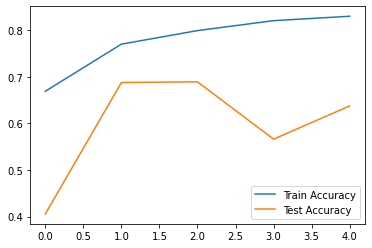

In [19]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.legend()
plt.show()

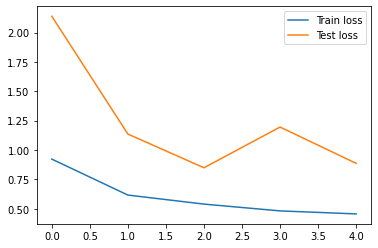

In [20]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

In [21]:
model.evaluate(x_test, y_test)

133/133 [==============================] - 32s 243ms/step - loss: 0.8868 - accuracy: 0.6376


[0.8867527842521667, 0.6376092433929443]